In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
Checklist:
    1. Who is our stakeholder?
    2. What are their needs?
    3. What are the constraints of project?
    4. Where will the data be obtained?
    5. What impact is expected based on problem statement?
    6. What KPI will be measured in the system?
    7. How will we disseminate results?
    8. Where will the end-product live?

SyntaxError: invalid syntax (<ipython-input-66-852e6d676ffe>, line 1)

In [49]:
# build data frame
np.random.seed(42)
result_1 = np.random.binomial(1, 0.03, 1200)
result_2 = np.random.binomial(1, 0.01, 1100)
user_id = list(range(1200+1100))

df = pd.DataFrame()
df['user'] = user_id
df['version'] = list(np.repeat(1, 1200)) + list(np.repeat(2, 1100))
df['convert'] = list(result_1) + list(result_2)
df = df.sample(frac=1, random_state=42)
df.head(10)

,user,version,convert
741,741,1,0
1917,1917,2,0
208,208,1,0
1546,1546,2,0
282,282,1,0
479,479,1,0
1080,1080,1,0
1891,1891,2,0
111,111,1,0
2085,2085,2,0


In [50]:
df.shape

(2300, 3)

#### How many people got each version?

In [51]:
df.describe()

,user,version,convert
count,2300.000000,2300.000000,2300.000000
mean,1149.500000,1.478261,0.019130
std,664.097131,0.499636,0.137013
min,0.000000,1.000000,0.000000
25%,574.750000,1.000000,0.000000
50%,1149.500000,1.000000,0.000000
75%,1724.250000,2.000000,0.000000
max,2299.000000,2.000000,1.000000


In [52]:
df.shape

(2300, 3)

In [53]:
df['version'].value_counts().reset_index()

,index,version
0,1,1200
1,2,1100


#### What is the true underlying difference in conversion between these two versions?

Note you wouldn't know this in the real world, but here our data is simulated. 

In [54]:
.02 - .017

0.002999999999999999

#### What is the estimated difference in coversion between these two versions? 

You would get this in practice.

In [55]:
df.query("version ==2").convert.mean() - df.query("version ==1").convert.mean()

-0.014015151515151515

In [63]:
print(df.query("version ==1").convert.mean(), df.query("version ==2").convert.mean() )

0.025833333333333333 0.011818181818181818


In [56]:
df.groupby('version').mean()

,user,convert
version,,
1,599.5,0.025833
2,1749.5,0.011818


##### Bootstrapping is "sampling with replacement"

It is done to simulate the sampling process a number of times to see how much our conversions might change (or difference in conversions in this case).

Use [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) and choose `replace = True` to create a bootstrapped sample of the original dataset.

In [57]:
df.sample(n=df.shape[0], replace=True, random_state=42)

,user,version,convert
812,812,1,0
258,258,1,0
1107,1107,1,0
1100,1100,1,0
1140,1140,1,0
...,...,...,...
448,448,1,0
435,435,1,0
526,526,1,0
517,517,1,0


In [58]:
df2 = df.sample(n=df.shape[0], replace=True, random_state=42)

In [59]:
df2.groupby('user').count().sort_values('version', ascending=False)

,version,convert
user,,
714,6,6
1723,6,6
1945,5,5
2089,5,5
1532,5,5
...,...,...
963,1,1
966,1,1
968,1,1


##### Write a function that simulates a resampling like the previous question 10,000 times, and then calculates the estimated difference between the two conversion rates.  

Store the differences in an array and return it in your function.

In [60]:
def bootstrap(num_bootstraps):
    all_diffs = []
    for _ in range(num_bootstraps):
        df2 = df.sample(n=df.shape[0], replace=True)
        diff = df2.query("version ==2").convert.mean() - df.query("version ==1").convert.mean()
        all_diffs.append(diff)
    return all_diffs

all_diffs = bootstrap(10000)

##### Build a histogram of the differences.

Based on your histogram, do you have evidence that there is truly a significant difference between the two versions?

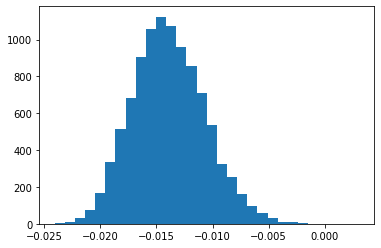

In [64]:
plt.hist(all_diffs, bins=30);

In [62]:
np.percentile(all_diffs, 2.5), np.percentile(all_diffs, 97.5)

(-0.019622153209109733, -0.007193735353532014)

we built a 95% confidence interval and determined a 0.7% to 0.2% lift that version 1 is better than version 2

##### What are some ways that might make it more likely that we would find a difference between the two versions?

In [ ]:
1. larger sample size
2. if the true effect size

#### Try changing these aspects in the second cell above, and then look at how your simulation results change.

Do you see more evidence of a difference based on your results?

#### When performing experiments there are four possible outcomes.

Based on the above truth, what are the two possible realities?


What would you need to change to simulate results to create the other two potential outcomes?